In [10]:
# Victor Z and Leo Gonzalez
# UW-Madison, 2020
# use MSE and cdf to benchmark models

import numpy as np
from scipy.stats import ecdf
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

In [11]:
# generate data (true model is Cp=a0+a1*T+a2*T^2)
# CP in cal/mol-K and T in K
a0 = 0.6190e+1
a1 = 0.2923e-2
a2 = -0.7052e-6
theta = np.array([a0, a1, a2])

# 3 sets of experiments at T=300K, T=400K, and T=500K
n = 10
N = 3*n
x1 = np.linspace(300, 300, n)
x2 = np.linspace(600, 600, n)
x3 = np.linspace(900, 900, n)
x = np.concatenate([x1, x2, x3]).T

# generate true outputs
np.random.seed(0)
y1 = a0+a1*x1+a2*x1**2
y2 = a0+a1*x2+a2*x2**2
y3 = a0+a1*x3+a2*x3**2
ytrue = np.concatenate([y1, y2, y3]).T

# add random noise to true outputs
# there are differences with Matlab because of different seed
sigma = 0.1
y = ytrue+np.random.normal(0, sigma, N)

In [12]:
# get model I
xsq = x**2
X = np.hstack([np.ones((N, 1)), x.reshape(-1, 1), xsq.reshape(-1, 1)])
Y = y

thetaest = np.linalg.inv(X.T@X)@X.T@Y
Yhat = X@thetaest
eI = (Y-Yhat)**2

In [13]:
# get model II
X2 = np.hstack([np.ones((N, 1)), x.reshape(-1, 1)])
Y = y

thetaest = np.linalg.inv(X2.T@X2)@X2.T@Y
Yhat = X2@thetaest
eII = (Y-Yhat)**2

MSE I: 0.01119401203687115
MSE II: 0.011919472531457163


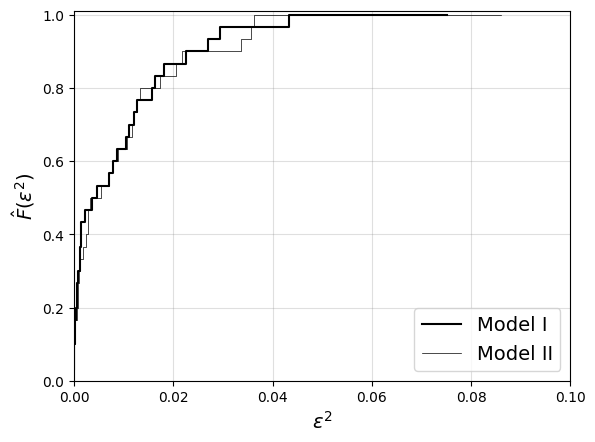

In [14]:
# compare mse
mseI = np.mean(eI)
mseII = np.mean(eII)

print(f'MSE I: {mseI}')
print(f'MSE II: {mseII}')

# compare using cdf
res1 = ecdf(eI)
F1 = res1.cdf.probabilities
t1 = res1.cdf.quantiles

res2 = ecdf(eII)
F2 = res2.cdf.probabilities
t2 = res2.cdf.quantiles

fig, ax = plt.subplots(1, 1)
ax.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax.set_axisbelow(True)
ax.set_xlabel(r'$\epsilon^2$', fontsize = 14)
ax.set_xlim(0, 0.1)
ax.set_ylabel(r'$\hat{F}(\epsilon^2)$', fontsize = 14)
ax.set_ylim(0, 1.01)
ax.step(t1, F1, 'k-', linewidth = 1.5, label = 'Model I')
ax.step(t2, F2, 'k-', linewidth = 0.5, label = 'Model II')
ax.legend(loc = 'lower right', fontsize = 14);

In [15]:
# lets do cross-validation (for first model)
# full data set
X = np.hstack([np.ones((N, 1)), x.reshape(-1, 1), xsq.reshape(-1, 1)])
Y = y

# shuffle data
S = len(y)
idx = np.arange(S)
idxS = shuffle(idx)

# partition indexes
idxP = [idxS[:10], idxS[10:20], idxS[20:]]

MSEI = np.zeros(len(idxP))

# for all partitions
for k in range(3):
    # get testing data
    Xp = X[idxP[k], :]
    Yp = Y[idxP[k]]

    # get training data
    Xt = np.vstack([X[idxP[j], :] for j in range(3) if j != k])
    Yt = np.hstack([Y[idxP[j]] for j in range(3) if j != k])

    # get model using training data
    thetat = np.linalg.inv(Xt.T@Xt)@Xt.T@Yt

    # test the model
    Yhatp = Xp@thetat
    et = (Yp-Yhatp)**2
    MSEI[k] = np.mean(et)

print(f'SUM MSEI: {np.sum(MSEI)}')

SUM MSEI: 0.03945889795829634


In [16]:
## lets do cross-validation (for second model)
# full data set
X = np.hstack([np.ones((N, 1)), x.reshape(-1, 1)])
Y = y

# shuffle data
S = len(y)
idx = np.arange(S)
idxS = shuffle(idx)

# partition indexes
idxP = [idxS[:10], idxS[10:20], idxS[20:]]

MSEII = np.zeros(len(idxP))


# for all partitions
for k in range(3):
    # get testing data
    Xp = X[idxP[k], :]
    Yp = Y[idxP[k]]

    # get training data
    Xt = np.vstack([X[idxP[j], :] for j in range(3) if j != k])
    Yt = np.hstack([Y[idxP[j]] for j in range(3) if j != k])

    # get model using training data
    thetat = np.linalg.inv(Xt.T@Xt)@Xt.T@Yt

    # test the model
    Yhatp = Xp@thetat
    et = (Yp-Yhatp)**2
    MSEII[k] = np.mean(et)

print(f'SUM MSEII: {np.sum(MSEII)}')


SUM MSEII: 0.04481685769437754
